In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Importing module
import warnings
# Warnings filter.
warnings.filterwarnings('ignore')

In [5]:
data = {
 'Alice':[78,89,92],
 'Bob':  [90,85,88],
  'Carol': [76,80,94]  
}
result = {name:round(sum(scores)/len(scores),2) for name, scores in data.items() if sum(scores) >250}
result

{'Alice': 86.33, 'Bob': 87.67}

### Project Task: Week 1 

Data Import and Preparation:

1. Import data. 

2. Figure out the primary key and look for the requirement of indexing.

3. Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain   
   explicitly the reason for the treatment chosen for each variable. 

In [2]:
train=pd.read_csv(r"C:\Users\Aaqui\Desktop\Data Science\Capstone\Project 1 - Real Estate\Project_1\Project 1\train.csv")
test=pd.read_csv(r"C:\Users\Aaqui\Desktop\Data Science\Capstone\Project 1 - Real Estate\Project_1\Project 1\test.csv")

In [3]:
train.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [4]:
test.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [5]:
train.shape

(27321, 80)

In [6]:
test.shape

(11709, 80)

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
UID,27321.0,257331.996303,21343.859725,220342.0,238816.000000,257220.000000,275818.000000,294334.00000
BLOCKID,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUMLEVEL,27321.0,140.000000,0.000000,140.0,140.000000,140.000000,140.000000,140.00000
COUNTYID,27321.0,85.646426,98.333097,1.0,29.000000,63.000000,109.000000,840.00000
STATEID,27321.0,28.271806,16.392846,1.0,13.000000,28.000000,42.000000,72.00000
...,...,...,...,...,...,...,...,...
pct_own,27053.0,0.640434,0.226640,0.0,0.502780,0.690840,0.817460,1.00000
married,27130.0,0.508300,0.136860,0.0,0.425102,0.526665,0.605760,1.00000
married_snp,27130.0,0.047537,0.037640,0.0,0.020810,0.038840,0.065100,0.71429
separated,27130.0,0.019089,0.020796,0.0,0.004530,0.013460,0.027488,0.71429


In [8]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
UID,11709.0,257525.004783,21466.372658,220336.0,238819.00000,257651.00000,276300.000000,294333.00000
BLOCKID,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUMLEVEL,11709.0,140.000000,0.000000,140.0,140.00000,140.00000,140.000000,140.00000
COUNTYID,11709.0,85.710650,99.304334,1.0,29.00000,61.00000,109.000000,810.00000
STATEID,11709.0,28.489196,16.607262,1.0,13.00000,28.00000,42.000000,72.00000
...,...,...,...,...,...,...,...,...
pct_own,11587.0,0.634194,0.232232,0.0,0.49250,0.68764,0.815235,1.00000
married,11625.0,0.505632,0.139774,0.0,0.42202,0.52527,0.605660,1.00000
married_snp,11625.0,0.047960,0.038693,0.0,0.02089,0.03868,0.065340,0.71429
separated,11625.0,0.019346,0.021428,0.0,0.00450,0.01387,0.027910,0.71429


In [9]:
train.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [10]:
test.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [11]:
# UID(user ID) is unique value in the train and test dataset. So index can be created from the UID feature.
train.set_index(keys=['UID'],inplace=True)#Set the DataFrame index using existing columns.
test.set_index(keys=['UID'],inplace=True)

In [12]:
train.isnull().sum()

BLOCKID        27321
SUMLEVEL           0
COUNTYID           0
STATEID            0
state              0
               ...  
pct_own          268
married          191
married_snp      191
separated        191
divorced         191
Length: 79, dtype: int64

In [13]:
test.isnull().sum()

BLOCKID        11709
SUMLEVEL           0
COUNTYID           0
STATEID            0
state              0
               ...  
pct_own          122
married           84
married_snp       84
separated         84
divorced          84
Length: 79, dtype: int64

In [14]:
# Handling Missing value
train.isnull().sum()/len(train)*100

BLOCKID        100.000000
SUMLEVEL         0.000000
COUNTYID         0.000000
STATEID          0.000000
state            0.000000
                  ...    
pct_own          0.980930
married          0.699096
married_snp      0.699096
separated        0.699096
divorced         0.699096
Length: 79, dtype: float64

In [15]:
# Drop blockid as it has maximum null values and drop Sum Level as it's value is constant(140) in both data sets
train=train.drop(['BLOCKID','SUMLEVEL'],axis=1)

In [16]:
test.isnull().sum()/len(test)*100

BLOCKID        100.000000
SUMLEVEL         0.000000
COUNTYID         0.000000
STATEID          0.000000
state            0.000000
                  ...    
pct_own          1.041934
married          0.717397
married_snp      0.717397
separated        0.717397
divorced         0.717397
Length: 79, dtype: float64

In [17]:
# Drop blockid as it has maximum null values and drop Sum Level as it's value is constant(140) in both data sets
test=test.drop(['BLOCKID','SUMLEVEL'],axis=1)

####  Handling Missing Values

In [18]:
missing_train_cols=[]
for col in train.columns:
    if train[col].isna().sum() !=0:
         missing_train_cols.append(col)
print(missing_train_cols)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [19]:
missing_test_cols=[]
for col in test.columns:
    if test[col].isna().sum() !=0:
         missing_test_cols.append(col)
print(missing_test_cols)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [20]:
# Imputing  missing values with mean as they must be b=numerical in nature
for col in train.columns:
    if col in (missing_train_cols):
        train[col].replace(np.nan,train[col].mean(),inplace=True)

In [21]:
# Imputing  missing values with mean as they must be b=numerical in nature
for col in test.columns:
    if col in (missing_test_cols):
        test[col].replace(np.nan,test[col].mean(),inplace=True)

In [22]:
train.isna().sum()

COUNTYID       0
STATEID        0
state          0
state_ab       0
city           0
              ..
pct_own        0
married        0
married_snp    0
separated      0
divorced       0
Length: 77, dtype: int64

In [23]:
test.isna().sum()

COUNTYID       0
STATEID        0
state          0
state_ab       0
city           0
              ..
pct_own        0
married        0
married_snp    0
separated      0
divorced       0
Length: 77, dtype: int64

#### Exploratory Data Analysis (EDA) 

4. Perform debt analysis. You may take the following steps:

•	Explore the top 2,500 locations where the percentage of households with a second mortgage is the  
    highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper 
    limit for the percent of households with a second mortgage to 50 percent

•	Use the following bad debt equation:

    •	Bad Debt = P (Second Mortgage ∩ Home Equity Loan)
    •	Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage
•	Create pie charts  to show overall debt and bad debt

•	Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, 
    and bad debt for different cities

•	Create a collated income distribution chart for family income, house hold income, and remaining 
    income

In [24]:
train_df=train[train['pct_own']>0.1]
train_df.shape

(26565, 77)

In [25]:
train_df=train_df.sort_values(by='second_mortgage',ascending=False)
train_df.head()

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
289712,147,51,Virginia,VA,Farmville,Farmville,Town,tract,23901,434,...,19.58762,19.16667,4.00258,673.39577,1124.0,0.62069,0.03612,0.01806,0.01806,0.00000
251185,27,25,Massachusetts,MA,Worcester,Worcester City,City,tract,1610,508,...,30.60147,26.16667,19.21553,262.09529,994.0,0.20247,0.37844,0.11976,0.09341,0.10539
269323,81,36,New York,NY,Corona,Harbor Hills,City,tract,11368,718,...,29.80694,27.66667,18.45616,448.69061,1932.0,0.15618,0.44490,0.14555,0.02357,0.04066
251324,3,24,Maryland,MD,Glen Burnie,Glen Burnie,CDP,tract,21061,410,...,32.53273,30.66667,19.61959,694.10357,2881.0,0.22380,0.58250,0.08321,0.00000,0.01778
235788,57,12,Florida,FL,Tampa,Egypt Lake-leto,City,tract,33614,813,...,34.53924,28.58333,18.56943,814.45000,2684.0,0.11618,0.36953,0.12876,0.09957,0.07339


In [26]:
top_2500_second_mortgage_pct_own_10 = train_df.head(2500)
top_2500_second_mortgage_pct_own_10

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
289712,147,51,Virginia,VA,Farmville,Farmville,Town,tract,23901,434,...,19.58762,19.16667,4.00258,673.39577,1124.0,0.62069,0.03612,0.01806,0.01806,0.00000
251185,27,25,Massachusetts,MA,Worcester,Worcester City,City,tract,1610,508,...,30.60147,26.16667,19.21553,262.09529,994.0,0.20247,0.37844,0.11976,0.09341,0.10539
269323,81,36,New York,NY,Corona,Harbor Hills,City,tract,11368,718,...,29.80694,27.66667,18.45616,448.69061,1932.0,0.15618,0.44490,0.14555,0.02357,0.04066
251324,3,24,Maryland,MD,Glen Burnie,Glen Burnie,CDP,tract,21061,410,...,32.53273,30.66667,19.61959,694.10357,2881.0,0.22380,0.58250,0.08321,0.00000,0.01778
235788,57,12,Florida,FL,Tampa,Egypt Lake-leto,City,tract,33614,813,...,34.53924,28.58333,18.56943,814.45000,2684.0,0.11618,0.36953,0.12876,0.09957,0.07339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229021,67,6,California,CA,Carmichael,Carmichael,City,tract,95608,916,...,42.55686,43.08333,21.33702,805.77720,3103.0,0.41425,0.44711,0.03273,0.00000,0.12335
261444,183,37,North Carolina,NC,Raleigh,Raleigh City,Village,tract,27606,919,...,29.19520,25.00000,13.44444,1044.70191,2965.0,0.12827,0.23974,0.07685,0.00827,0.07165
225977,37,6,California,CA,Marina Del Rey,Marina Del Rey,City,tract,90292,310,...,44.81016,41.41667,18.58900,343.62694,1590.0,0.44682,0.27404,0.04473,0.02057,0.13162


In [27]:
import plotly.express as ply
import plotly.graph_objects as plygh

#### Visualization using Geo Map 

In [28]:
# Visualization 1 (Geo-Map):
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

fig = go.Figure(data=go.Scattergeo(
    lat = top_2500_second_mortgage_pct_own_10['lat'],
    lon = top_2500_second_mortgage_pct_own_10['lng']),
    )
fig.update_layout(
    geo=dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title='Top 2,500 locations with second mortgage is the highest and percent ownership is above 10 percent')
fig.show()


In [29]:
train['bad_debt']=train['second_mortgage']+train['home_equity']-train['home_equity_second_mortgage']

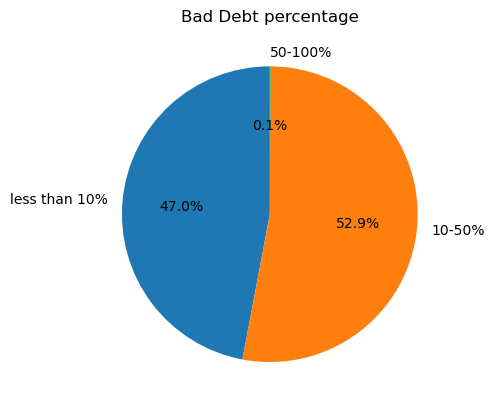

In [30]:
# Visualization 2:
train['bins_bad_debt'] = pd.cut(train['bad_debt'],bins=[0,0.1,.5,1], labels=["less than 10%","10-50%","50-100%"])
train.groupby(['bins_bad_debt']).size().plot(kind='pie',subplots=True,startangle=90, autopct='%1.1f%%')
plt.title('Bad Debt percentage')
plt.ylabel("")

plt.show()

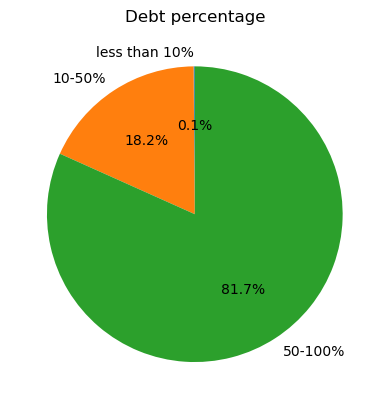

In [31]:
# Visualization 3:
train['bins_debt'] = pd.cut(train['debt'],bins=[0,0.1,.5,1], labels=["less than 10%","10-50%","50-100%"])
train.groupby(['bins_debt']).size().plot(kind='pie',subplots=True,startangle=90, autopct='%1.1f%%')
plt.title('Debt percentage')
plt.ylabel("")

plt.show()

In [32]:
cols=['second_mortgage','home_equity','debt','bad_debt']
train_box_hamilton=train.loc[train['city'] == 'Hamilton']
train_box_manhattan=train.loc[train['city'] == 'Manhattan']
train_box_city=pd.concat([train_box_hamilton,train_box_manhattan])
train_box_city.head(4)

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt,bins_bad_debt,bins_debt
UID,,,,,,,,,,,,,,,,,,,,,
267822,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,...,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,0.09408,less than 10%,50-100%
263797,21,34,New Jersey,NJ,Hamilton,Yardville,City,tract,8610,609,...,732.58443,3124.0,0.64400,0.56377,0.01980,0.00990,0.04892,0.18071,10-50%,50-100%
270979,17,39,Ohio,OH,Hamilton,Hamilton City,Village,tract,45015,513,...,565.32725,2528.0,0.61278,0.47397,0.04419,0.02663,0.13741,0.15005,10-50%,50-100%
259028,95,28,Mississippi,MS,Hamilton,Hamilton,CDP,tract,39746,662,...,483.01311,1954.0,0.83241,0.58678,0.01052,0.00000,0.11721,0.02130,less than 10%,10-50%


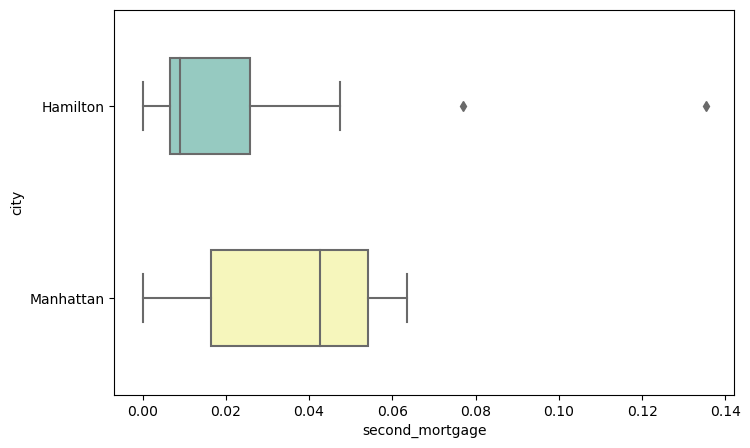

In [33]:
# Visualization 4:
plt.figure(figsize=(8,5))
sns.boxplot(data=train_box_city,x='second_mortgage', y='city',width=0.5,palette="Set3")
plt.show()

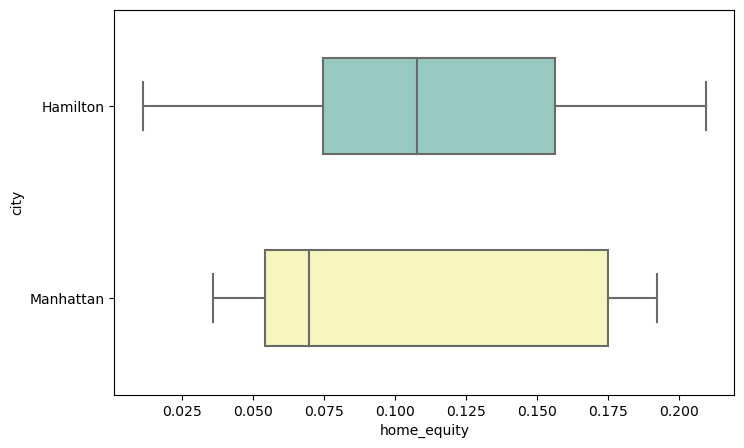

In [34]:
# Visualization 5:
plt.figure(figsize=(8,5))
sns.boxplot(data=train_box_city,x='home_equity', y='city',width=0.5,palette="Set3")
plt.show()

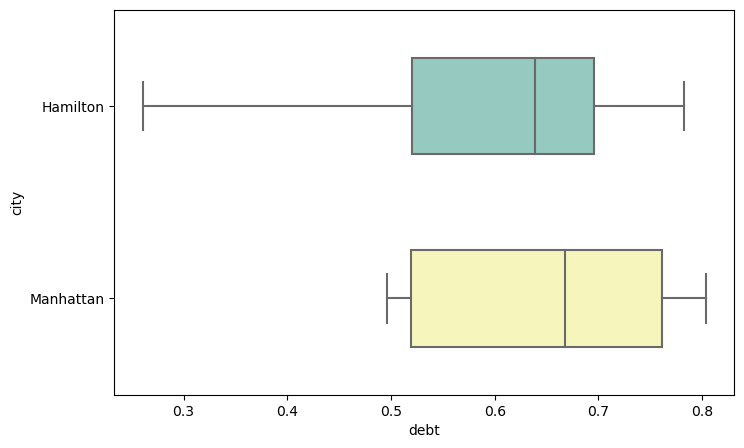

In [35]:
# Visualization 6:
plt.figure(figsize=(8,5))
sns.boxplot(data=train_box_city,x='debt', y='city',width=0.5,palette="Set3")
plt.show()

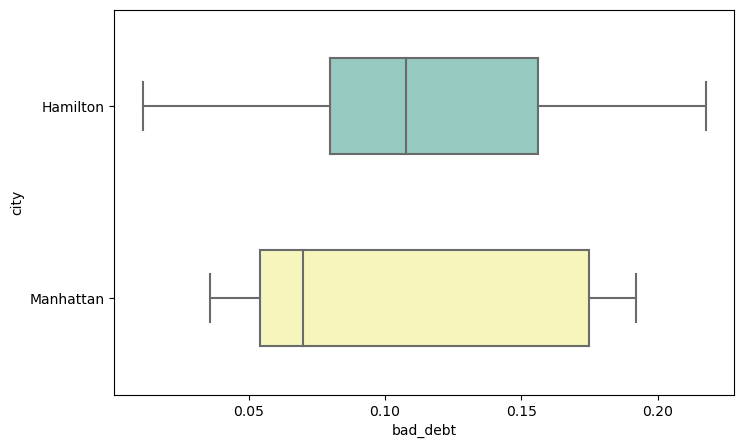

In [36]:
# Visualization 7:
plt.figure(figsize=(8,5))
sns.boxplot(data=train_box_city,x='bad_debt', y='city',width=0.5,palette="Set3")
plt.show()

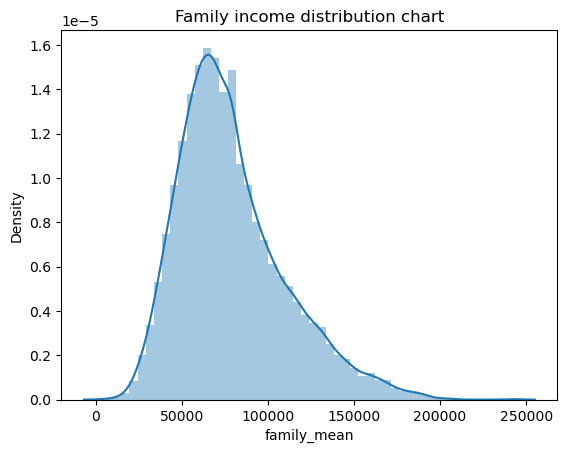

In [37]:
# Visualization 8:
sns.distplot(train['family_mean'])
plt.title('Family income distribution chart')
plt.show()

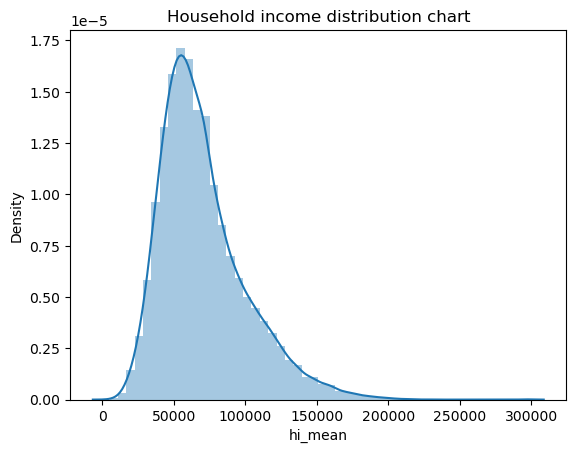

In [38]:
# Visualization 9:
sns.distplot(train['hi_mean'])
plt.title('Household income distribution chart')
plt.show()


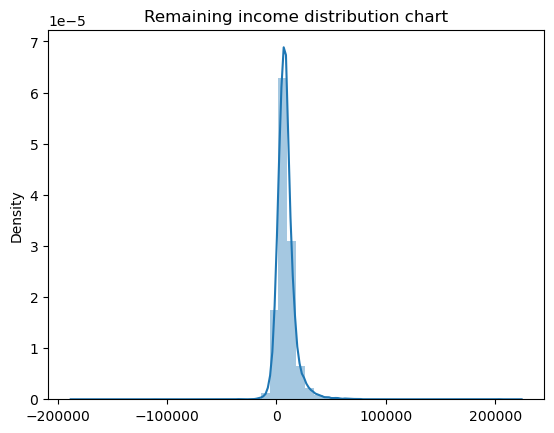

In [39]:
# Visualization 10:
sns.distplot(train['family_mean']-train['hi_mean'])
plt.title('Remaining income distribution chart')
plt.show()

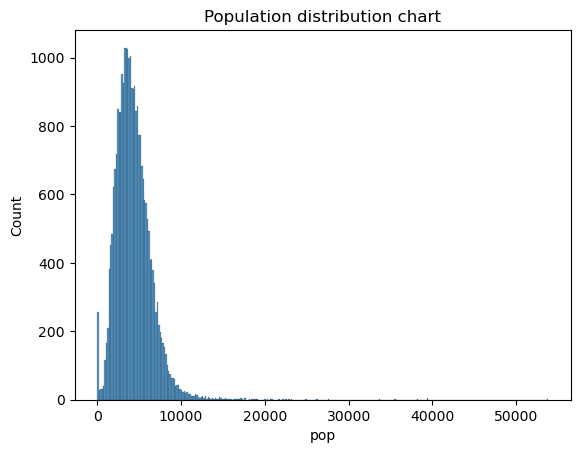

In [40]:
# Visualization 11:
sns.histplot(train['pop'])
plt.title('Population distribution chart')
plt.show()

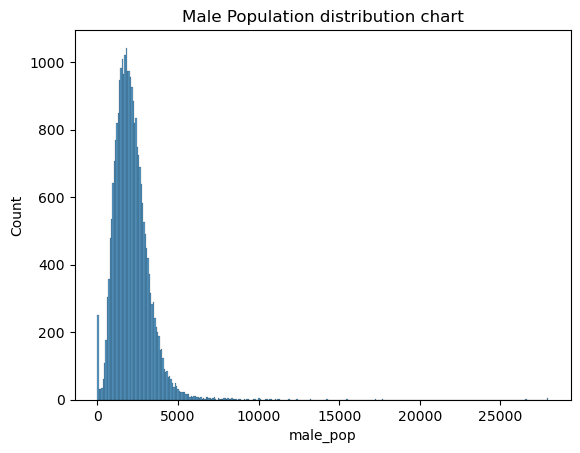

In [41]:
# Visualization 12:
sns.histplot(train['male_pop'])
plt.title('Male Population distribution chart')
plt.show()

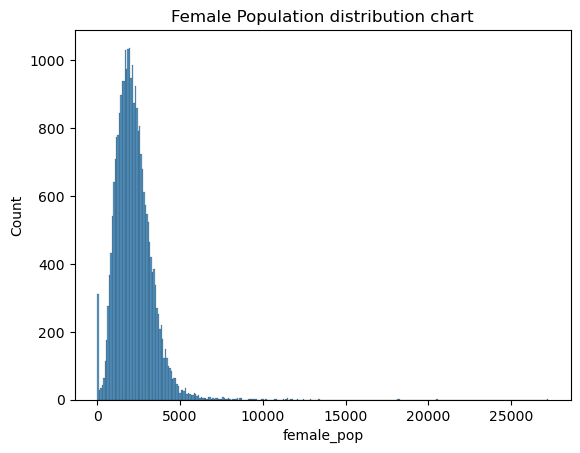

In [42]:
# Visualization 13:
sns.histplot(train['female_pop'])
plt.title('Female Population distribution chart')
plt.show()

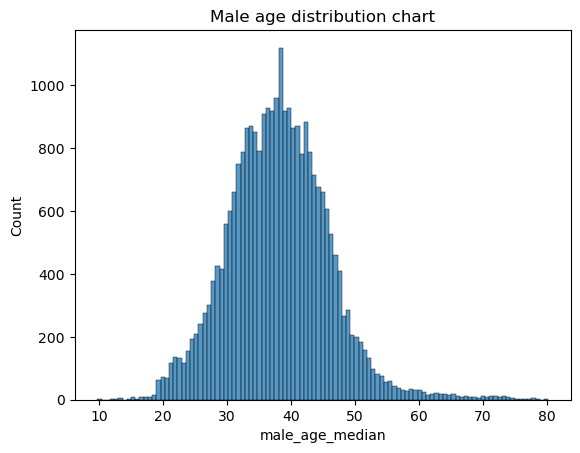

In [43]:
# Visualization 14:
sns.histplot(train['male_age_median'])
plt.title('Male age distribution chart')
plt.show()

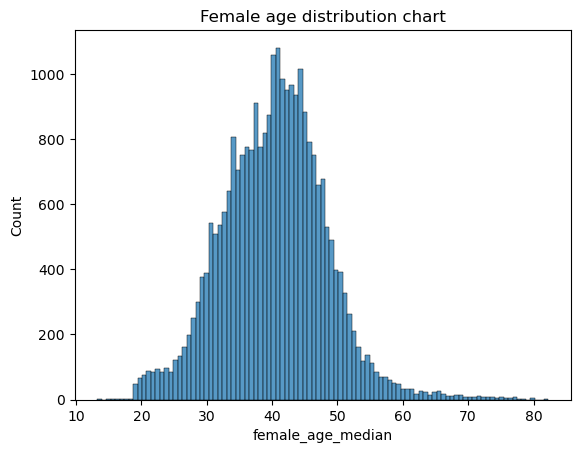

In [44]:
# Visualization 15:
sns.histplot(train['female_age_median'])
plt.title('Female age distribution chart')
plt.show()

### 5. Perform EDA and come out with insights into population density and age.

•	Use pop and ALand variables to create a new field called population density

•	Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called 
    median age

•	Visualize the findings using appropriate chart type 

In [45]:
train["Pop_density"]=train["pop"]/train["ALand"]

In [46]:
test["Pop_density"]=test["pop"]/test["ALand"]

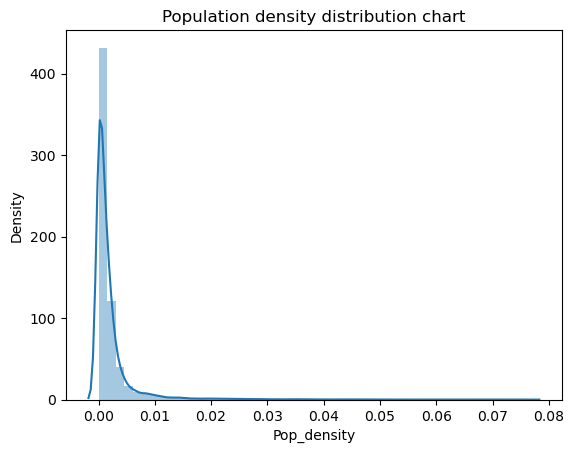

In [47]:
# Visualization 16:
sns.distplot(train['Pop_density'])
plt.title('Population density distribution chart')
plt.show()

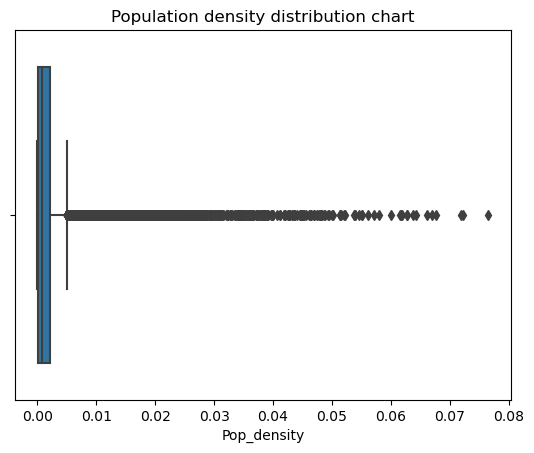

In [48]:
# Visualization 17:
sns.boxplot(train['Pop_density'])
plt.title('Population density distribution chart')
plt.show()

In [49]:
train["median_age"]=(train["male_age_median"]+train["female_age_median"])/2

In [50]:
test["median_age"]=(test["male_age_median"]+test["female_age_median"])/2

In [51]:
train[['male_age_median','female_age_median','male_pop','female_pop','median_age']].head()

,male_age_median,female_age_median,male_pop,female_pop,median_age
UID,,,,,
267822,44.00000,45.33333,2612,2618,44.666665
246444,32.00000,37.58333,1349,1284,34.791665
245683,40.83333,42.83333,3643,3238,41.833330
279653,48.91667,50.58333,1141,1559,49.750000
247218,22.41667,21.58333,2586,3051,22.000000


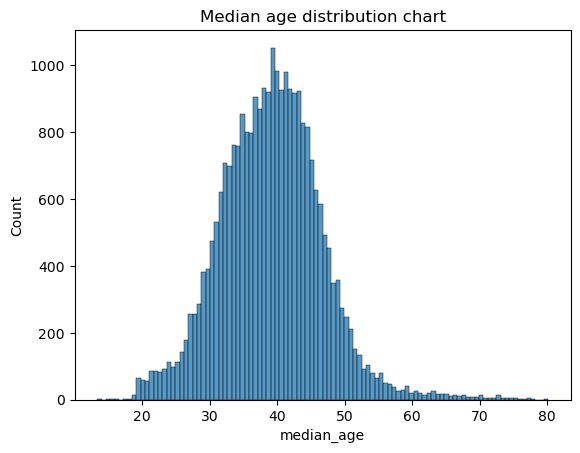

In [52]:
# Visualization 18:
sns.histplot(train['median_age'])
plt.title('Median age distribution chart')
plt.show()

### 6. Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

•	Analyze the married, separated, and divorced population for these population brackets

•	Visualize using appropriate chart type 

In [53]:
train['pop'].describe()

count    27321.000000
mean      4316.032685
std       2169.226173
min          0.000000
25%       2885.000000
50%       4042.000000
75%       5430.000000
max      53812.000000
Name: pop, dtype: float64

In [54]:
train['pop_bins']=pd.cut(train['pop'],bins=5,labels=['very low','low','medium','high','very high'])

In [55]:
train[['pop','pop_bins']]

,pop,pop_bins
UID,,
267822,5230,very low
246444,2633,very low
245683,6881,very low
279653,2700,very low
247218,5637,very low
...,...,...
279212,1847,very low
277856,4155,very low
233000,2829,very low


In [56]:
train['pop_bins'].value_counts()

very low     27058
low            246
medium           9
high             7
very high        1
Name: pop_bins, dtype: int64

In [57]:
train.groupby(by='pop_bins')[['married','separated','divorced']].count()

,married,separated,divorced
pop_bins,,,
very low,27058,27058,27058
low,246,246,246
medium,9,9,9
high,7,7,7
very high,1,1,1


In [58]:
train.groupby(by='pop_bins')[['married','separated','divorced']].agg(['mean','median'])

married           separated            divorced          
               mean    median      mean    median      mean    median
pop_bins                                                             
very low   0.507548  0.524680  0.019126  0.013650  0.100504  0.096020
low        0.584894  0.593135  0.015833  0.011195  0.075348  0.070045
medium     0.655737  0.618710  0.005003  0.004120  0.065927  0.064890
high       0.503359  0.335660  0.008141  0.002500  0.039030  0.010320
very high  0.734740  0.734740  0.004050  0.004050  0.030360  0.030360

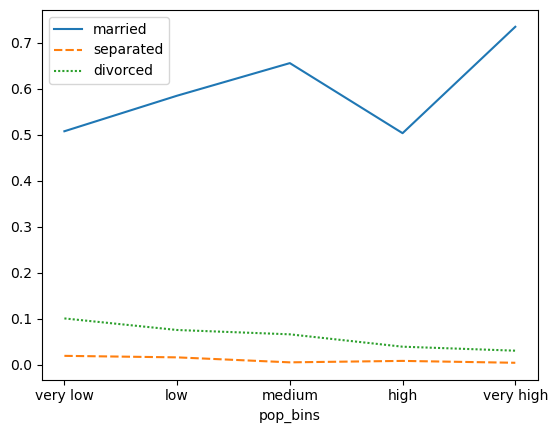

In [59]:
# Visualization 19:
maritial_status_pop_bin=train.groupby(by='pop_bins')[['married','separated','divorced']].agg(["mean"])
sns.lineplot(data=maritial_status_pop_bin)
plt.show()

#### EDA -7 :Detail your observations for rent as a percentage of income at an overall level, and for different states. 

Percentage of income for different states

In [60]:
mean_rent_state=train.groupby(by='state')['rent_mean'].agg(["mean"])
mean_rent_state.head().reset_index()

,state,mean
0,Alabama,774.004927
1,Alaska,1185.763570
2,Arizona,1097.753511
3,Arkansas,720.918575
4,California,1471.133857


In [61]:
mean_income_state=train.groupby(by='state')['family_mean'].agg(["mean"])
mean_income_state.head().reset_index()

,state,mean
0,Alabama,67030.064213
1,Alaska,92136.545109
2,Arizona,73328.238798
3,Arkansas,64765.377850
4,California,87655.470820


In [62]:
rent_perc_of_income=mean_rent_state['mean']/mean_income_state['mean']
rent_perc_of_income.head(10)

state
Alabama                 0.011547
Alaska                  0.012870
Arizona                 0.014970
Arkansas                0.011131
California              0.016783
Colorado                0.013529
Connecticut             0.012637
Delaware                0.012929
District of Columbia    0.013198
Florida                 0.015772
Name: mean, dtype: float64

Percentage of income at an overall level

In [63]:
sum(train['rent_mean'])/sum(train['family_mean'])

0.013358170721473864

#### EDA 8: Correlation analysis for all the relevant variables by creating a heatmap.

In [64]:
train[["COUNTYID","STATEID","zip_code", "type","pop","family_mean",'second_mortgage', 'home_equity', 'debt','hs_degree','median_age','pct_own', 'married','separated','divorced']].corr()

,COUNTYID,STATEID,zip_code,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,median_age,pct_own,married,separated,divorced
COUNTYID,1.000000,0.224549,0.036527,-0.002662,-0.075688,-0.039283,-0.123939,-0.086231,-0.062703,-0.063521,-0.004632,-0.021428,0.069059,0.048850
STATEID,0.224549,1.000000,-0.261465,-0.036599,-0.071612,-0.112512,-0.145301,-0.160532,0.014132,-0.017172,0.069314,0.025763,0.030409,0.018748
zip_code,0.036527,-0.261465,1.000000,0.083058,-0.024658,0.067693,-0.073191,0.057775,-0.077672,-0.126150,-0.069965,0.030217,-0.048023,0.043310
pop,-0.002662,-0.036599,0.083058,1.000000,0.128173,0.079675,0.099352,0.231013,0.049238,-0.162499,0.088457,0.167656,-0.083182,-0.160931
family_mean,-0.075688,-0.071612,-0.024658,0.128173,1.000000,0.074703,0.458973,0.378871,0.634493,0.300215,0.450961,0.480095,-0.323433,-0.353274
second_mortgage,-0.039283,-0.112512,0.067693,0.079675,0.074703,1.000000,0.510460,0.351298,0.064412,-0.116616,-0.054530,-0.006438,-0.010731,-0.056991
home_equity,-0.123939,-0.145301,-0.073191,0.099352,0.458973,0.510460,1.000000,0.532062,0.354566,0.063776,0.140941,0.189763,-0.155198,-0.207202
debt,-0.086231,-0.160532,0.057775,0.231013,0.378871,0.351298,0.532062,1.000000,0.279957,-0.213281,0.034207,0.108496,-0.119073,-0.222350
hs_degree,-0.062703,0.014132,-0.077672,0.049238,0.634493,0.064412,0.354566,0.279957,1.000000,0.334228,0.390815,0.370706,-0.333321,-0.092984
median_age,-0.063521,-0.017172,-0.126150,-0.162499,0.300215,-0.116616,0.063776,-0.213281,0.334228,1.000000,0.546692,0.495153,-0.116763,0.164205


<AxesSubplot:>

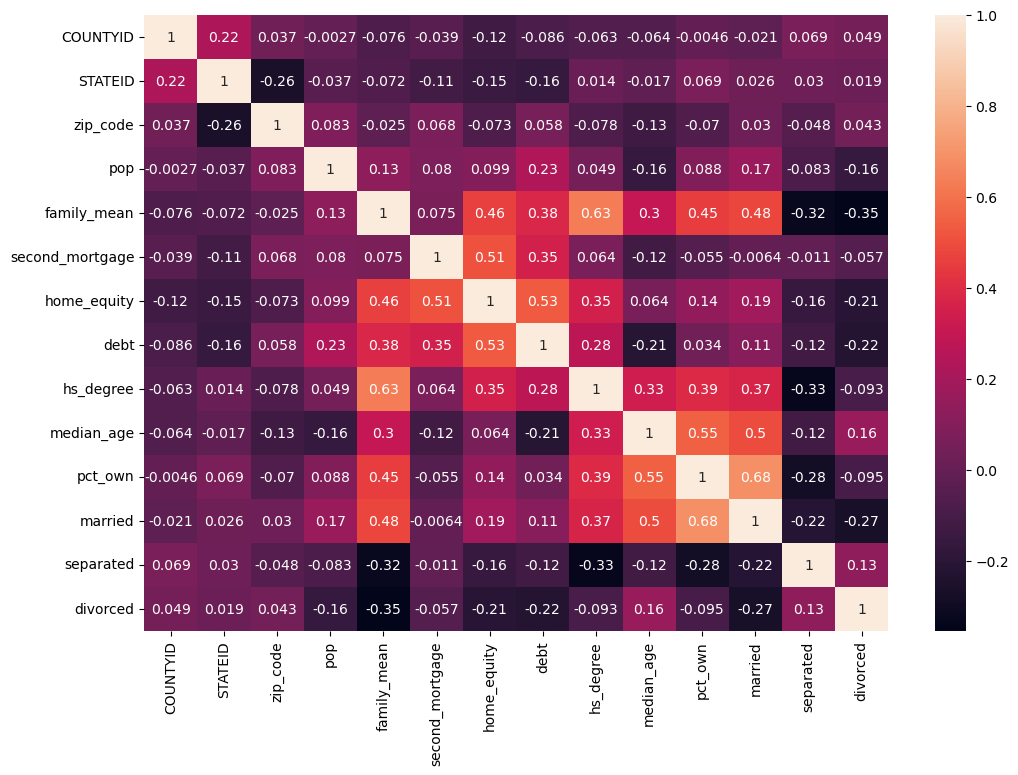

In [65]:
# Visualizing the correlations
#The darker is the color, the stronger is the correlation
plt.figure(figsize=(12,8))
sns.heatmap(train[["COUNTYID","STATEID","zip_code", "type","pop","family_mean",'second_mortgage', 'home_equity', 'debt','hs_degree','median_age','pct_own', 'married','separated','divorced']].corr(),annot=True)

### Project Task: Week 2

#### Data Preprocessing

1. The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 

2. Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data. 

Following are the list of latent variables:

•	Highschool graduation rates

•	Median population age

•	Second mortgage statistics

•	Percent own

•	Bad debt expense

In [66]:
from sklearn.decomposition import FactorAnalysis

In [67]:
fa = FactorAnalysis(n_components=5,random_state=11)

In [68]:
train_transformed = fa.fit_transform(train.select_dtypes(exclude=('object','category')))

In [69]:
train_transformed

array([[ 0.05640687, -0.05073008,  1.25006247, -0.30338428,  0.51746777],
       [-0.10015645,  0.01442735,  0.1102061 , -0.95904112, -0.31956407],
       [-0.04710979, -0.0094559 ,  0.13101654,  0.45160892,  1.13782793],
       ...,
       [ 0.93167634, -0.37995383, -0.96910904,  0.42014454, -0.71233683],
       [-0.08682288,  0.00848632, -0.88592437,  3.05985806,  2.40729654],
       [-0.09529886,  0.01164864, -1.33144363, -0.66807282, -0.16245966]])

In [70]:
train_transformed.shape

(27321, 5)

In [72]:
x_train=pd.read_csv(r"C:\Users\Aaqui\Desktop\Data Science\Capstone\Project 1 - Real Estate\Project_1\Project 1\train.csv")
x_test=pd.read_csv(r"C:\Users\Aaqui\Desktop\Data Science\Capstone\Project 1 - Real Estate\Project_1\Project 1\test.csv")

In [73]:
x_train.drop(['BLOCKID','SUMLEVEL'],axis=1,inplace=True)

In [74]:
x_train.dropna(axis=0,inplace=True)
x_train.head()

,UID,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,63,18,Indiana,IN,Danville,Danville,City,tract,46122,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [75]:
x_train.drop_duplicates(inplace=True)
x_train.head()

,UID,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,63,18,Indiana,IN,Danville,Danville,City,tract,46122,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [76]:
x_train.shape

(26585, 78)

In [77]:
x_test.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [78]:
x_test.shape

(11709, 80)

In [79]:
x_test.drop(['BLOCKID','SUMLEVEL'],axis=1,inplace=True)

In [80]:
x_test.dropna(axis=0,inplace=True)

In [81]:
x_test.drop_duplicates(inplace=True)
x_test.head()

,UID,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,48239,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,1,23,Maine,ME,Auburn,Auburn City,City,tract,4210,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,tract,14871,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,231,21,Kentucky,KY,Monticello,Monticello City,City,tract,42633,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,355,48,Texas,TX,Corpus Christi,Edroy,Town,tract,78410,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [82]:
x_test.shape

(11355, 78)

In [83]:
train_imp_feature = x_train.select_dtypes(exclude=('object','category'))
train_imp_feature.head()

,UID,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,pop,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,53,36,13346,315,42.840812,-75.501524,202183361.0,1699120,5230,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,141,18,46616,574,41.701441,-86.266614,1560828.0,100363,2633,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,63,18,46122,317,39.792202,-86.515246,69561595.0,284193,6881,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,127,72,927,787,18.396103,-66.104169,1105793.0,0,2700,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,161,20,66502,785,39.195573,-96.569366,2554403.0,0,5637,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [84]:
train_imp_feature.shape

(26585, 72)

In [85]:
# Dropping features which are unrelated to hc_mortgage_mean
drop_unimp = ['UID','COUNTYID', 'STATEID', 'zip_code', 'area_code', 'lat', 'lng']

In [86]:
for col in train_imp_feature.columns:
    if col in drop_unimp:
        train_imp_feature.drop(col,axis=1,inplace=True)

In [87]:
train_imp_feature.head()

,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,1560828.0,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,69561595.0,284193,6881,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,1105793.0,0,2700,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,2554403.0,0,5637,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [88]:
x_train_imp_features = train_imp_feature[['pop','rent_median','hi_median','family_median','hc_mean','second_mortgage','home_equity','debt','hs_degree','pct_own','married','separated','divorced']]

In [89]:
x_train_imp_features.head()

,pop,rent_median,hi_median,family_median,hc_mean,second_mortgage,home_equity,debt,hs_degree,pct_own,married,separated,divorced
0,5230,784.0,48120.0,53245.0,570.01530,0.02077,0.08919,0.52963,0.89288,0.79046,0.57851,0.01240,0.08770
1,2633,848.0,35186.0,43023.0,351.98293,0.02222,0.04274,0.60855,0.90487,0.52483,0.34886,0.01426,0.09030
2,6881,703.0,74964.0,85395.0,556.45986,0.00000,0.09512,0.73484,0.94288,0.85331,0.64745,0.01607,0.10657
3,2700,782.0,37845.0,44399.0,288.04047,0.01086,0.01086,0.52714,0.91500,0.65037,0.47257,0.02021,0.10106
4,5637,881.0,22497.0,50272.0,443.68855,0.05426,0.05426,0.51938,1.00000,0.13046,0.12356,0.00000,0.03109


In [90]:
x_train_imp_features.shape

(26585, 13)

In [91]:
y_train=x_train['hc_mortgage_mean']
y_train.shape

(26585,)

In [92]:
x_test_imp_features = x_test[['pop','rent_median','hi_median','family_median','hc_mean','second_mortgage','home_equity','debt','hs_degree','pct_own','married','separated','divorced']]

In [93]:
x_test_imp_features.head()

,pop,rent_median,hi_median,family_median,hc_mean,second_mortgage,home_equity,debt,hs_degree,pct_own,married,separated,divorced
0,3417,859.0,38746.0,45167.0,488.51323,0.06443,0.07651,0.63624,0.91047,0.70252,0.28217,0.03813,0.14299
1,3796,750.0,61008.0,74759.0,661.31296,0.01175,0.14375,0.64755,0.94290,0.85128,0.64221,0.00000,0.13377
2,3944,755.0,51648.0,57186.0,397.44466,0.01316,0.06497,0.45395,0.89238,0.81897,0.59961,0.01358,0.10026
3,2508,385.0,31612.0,34687.0,200.88113,0.00995,0.01741,0.41915,0.60908,0.84609,0.56953,0.04694,0.12489
4,6230,997.0,94211.0,103898.0,867.57713,0.00000,0.03440,0.63188,0.86297,0.79077,0.57620,0.00588,0.16379


In [94]:
x_test_imp_features.shape

(11355, 13)

In [95]:
y_test=x_test['hc_mortgage_mean']
y_test.shape

(11355,)

In [96]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_ss=ss.fit_transform(x_train_imp_features)
x_test_ss=ss.fit_transform(x_test_imp_features)

### Data Modeling : 
3. Build a linear Regression model to predict the total monthly expenditure for home mortgages loan.  

In [97]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [98]:
lr.fit(x_train_ss,y_train)

LinearRegression()

In [99]:
pred_y=lr.predict(x_test_ss)

In [100]:
lr.coef_

array([-2.36966239e-01,  1.34698057e+02,  4.33879043e+01,  2.04614223e+02,
        2.48805713e+02,  6.65122091e+00,  6.91264360e+01, -1.13809743e+01,
       -5.93583236e+01, -1.20708368e+02,  2.41727153e+01, -4.09419187e+00,
       -2.83087588e+01])

In [101]:
print(y_test.shape)
print(pred_y.shape)

(11355,)
(11355,)


In [102]:
from sklearn import metrics

In [103]:
rmse = np.sqrt( metrics.mean_squared_error(pred_y,y_test ))
rmse

277.12569673430545

In [104]:
metrics.r2_score( y_test, pred_y )

0.8072693835718514

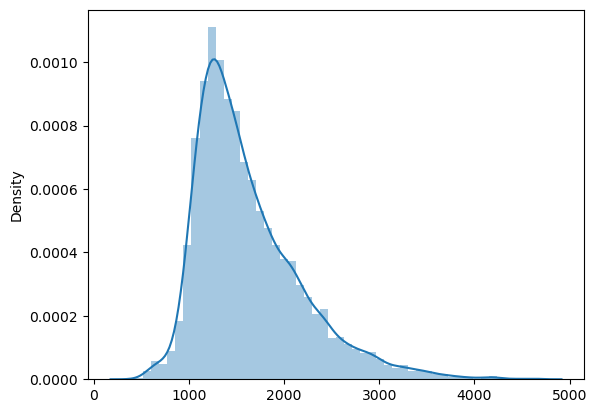

In [105]:
sns.distplot(pred_y)
plt.show()

### Data Reporting:

4. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

    •	Box plot of distribution of average rent by type of place (village, urban, town, etc.).

    •	Pie charts to show overall debt and bad debt.

    •	Explore the top 2,500 locations where the percentage of households with a second mortgage is 
        the highest and percent ownership is above 10 percent. Visualize using geo-map.

    •	Heat map for correlation matrix.

    •	Pie chart to show the population distribution across different types of places (village,urban, town etc.).